# Performing Deep Learning


### Loading the Datasets


In [160]:
import pandas as pd
# dataset with original features
X_original = pd.read_excel("./Datasets/cleaned_scaled.xlsx")
# dataset with features of reduced Dimensionality
X_pca = pd.read_excel("./Datasets/PCA_features.xlsx")

seperating features and labels

In [161]:
features_original = X_original.drop(columns=["Churn Value"])

features_pca = X_pca

y_original = X_original["Churn Value"]
y_pca = X_original["Churn Value"]

### Splitting the Data into Train Test Split

In [162]:
from sklearn.model_selection import train_test_split
# for original features
X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(features_original, y_original, test_size=0.33, random_state=2)
# for pca features
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(features_pca, y_pca, test_size=0.33, random_state=2)

input_shape = [X_train_original.shape[1]]

## Creating Deep Learning Model

<AxesSubplot: title={'center': 'Accuracy'}>

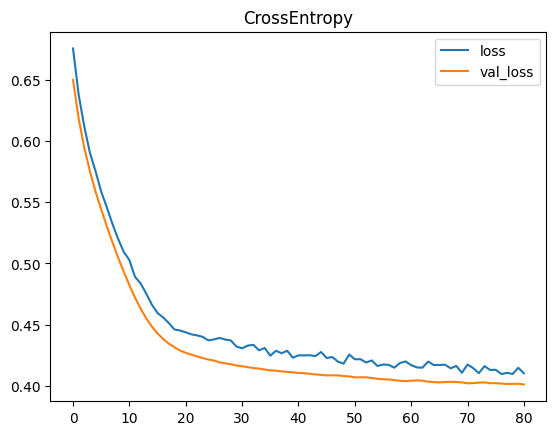

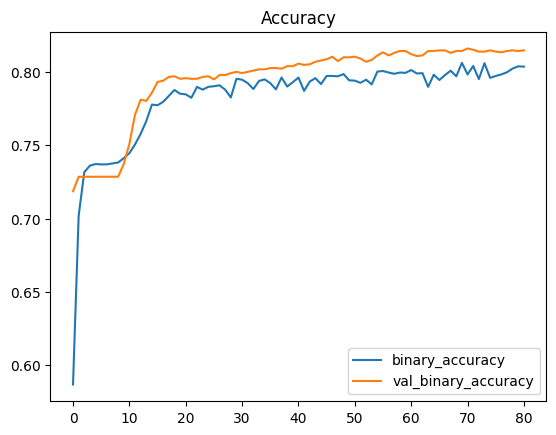

In [163]:
from tensorflow import keras
from keras import layers

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid'),
])

from keras.optimizers import Adam
new_optimizer = Adam(learning_rate=0.0001)

model.compile(
    optimizer=new_optimizer,
    loss='binary_crossentropy',
    metrics=['binary_accuracy']
)

early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(
    X_train_original, y_train_original,
    validation_data=(X_test_original, y_test_original),
    batch_size=512,
    epochs=250,
    callbacks=[early_stopping],
    verbose=0,
)

history_df = pd.DataFrame(history.history)
history_df.loc[:,["loss", "val_loss"]].plot(title='CrossEntropy')
history_df.loc[:,["binary_accuracy", "val_binary_accuracy"]].plot(title='Accuracy')

In [164]:
original_predicted = pd.DataFrame(model.predict(X_test_original))
original_predicted['sur'] = original_predicted[0].apply(lambda x: 1 if x>= 0.5 else 0)
original_predicted = original_predicted.drop(columns=[0])

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# for original features
print("Accuracy Score (with original features): ")
print(accuracy_score(y_test_original, original_predicted), "\n")
print("Precision Score (with original features): ")
print(precision_score(y_test_original, original_predicted), "\n")
print("Recall Score (with original features): ")
print(recall_score(y_test_original, original_predicted), "\n")
print("F1 Score (with original features): ")
print(f1_score(y_test_original, original_predicted), "\n", "\n")

73/73 [==============================] - 0s 2ms/step
Accuracy Score (with original features): 
0.8160275743214132 

Precision Score (with original features): 
0.6809269162210339 

Recall Score (with original features): 
0.6063492063492063 

F1 Score (with original features): 
0.6414777497900924 
 

